# Modelling

In [186]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statistics
from visualisations import compare_histograms
import random
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import modelling as ml
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# set random seed for reproducibility
np.random.seed(42)

sns.set_theme(context='notebook', style='darkgrid', palette='Set3')

In [187]:
# Import label encoded and ready for modelling set from 02 file 
df = pd.read_csv('../data/modelling_wines.csv')
df.set_index('name', inplace=True)
df.head()

,region,country,vintage,producer,wine_variety,grape_variety,price,rating,rating_qty,abv,from_vivino,age,log_price
name,,,,,,,,,,,,,
00 Wines Vgw Chardonnay 2017,51.0,18.0,26.0,0.0,4.0,47.0,66.0,0.0,0.0,13.000000,0.0,1992.0,4.189655
00 Wines Vgr Pinot Noir 2019,51.0,18.0,29.0,0.0,1.0,131.0,82.0,0.0,0.0,12.900000,0.0,1989.0,4.406719
00 Wines Egw Chardonnay 2019,51.0,18.0,29.0,0.0,4.0,47.0,95.0,0.0,0.0,13.446394,0.0,1989.0,4.553877
100 Nails Ranch Pinot Noir 2019,95.0,18.0,29.0,1.0,1.0,131.0,14.0,0.0,0.0,14.200000,0.0,1989.0,2.639057
100 Nails Ranch Chardonnay 2019,279.0,18.0,29.0,1.0,4.0,47.0,14.0,0.0,0.0,14.200000,0.0,1989.0,2.639057


In [188]:
# df_encoded = pd.get_dummies(df, columns=['region', 'country', 'vintage', 'wine_variety', 
#                                         'grape_variety', 'from_vivino', 'producer'],  drop_first=True, dtype=int)

# Baseline Model

Basic Linear Regression with nulls imputed from median 

In [189]:
# df_encoded['abv'].fillna(df_encoded['abv'].median(), inplace=True)

In [190]:
# lr = LinearRegression()

# lr.fit(X_train, y_train)
# y_pred = lr.predict(X_test)
# print(f" Cross validated r2: {cross_val_score(lr, X_train, y_train, cv = 10,scoring='r2')}")
# print(f" Mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

In [191]:
# df_encoded = pd.get_dummies(df, columns=['country', 'vintage', 'wine_variety', 
#                                         'grape_variety', 'from_vivino'],  drop_first=True, dtype=int)
# # df_encoded['abv'].fillna(df_encoded['abv'].median(), inplace=True)

X = df.drop(columns = ['log_price', 'price'])
y = df['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.85)

In [192]:
# lr = LinearRegression()

# lr.fit(X_train, y_train)
# y_pred = lr.predict(X_test)
# print(f" Cross validated r2: {cross_val_score(lr, X_train, y_train, cv = 10,scoring='r2')}")
# print(f" Root mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

In [193]:
# results = ml.regression_model_selector(X_train, y_train, X_test, y_test)
# results

In [194]:
# results['date/desc'] = '7/3 | ABV imputed LR | Target: PRICE | Features: all features label encoded'
# model_tracker_current = pd.read_csv('../data/model_tracker.csv')
# model_tracker_current = pd.concat([model_tracker_current, results])
# model_tracker_current.to_csv('../data/model_tracker.csv', index=False)
# model_tracker_current


## Decision Tree Regression

In [195]:
# # No hyper parameter tuning
# dt = DecisionTreeRegressor()

# dt.fit(X_train, y_train)

# y_pred = dt.predict(X_test)


# print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}")
# print(f"R-squared (R2): {r2_score(y_test, y_pred)}")


In [196]:
# dt = DecisionTreeRegressor()
# param_grid = {
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# gs = GridSearchCV(estimator=dt, param_grid=param_grid, 
#                            cv=5, scoring='mean_squared_error', 
#                            verbose=2, n_jobs=-1)

# gs.fit(X_train, y_train)

# print("Best parameters found: ", gs.best_params_)

# print("Best score:", gs.best_score_)

# best_model = gs.best_estimator_

# y_pred = best_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print(f"Test RMSE: {np.sqrt(mse)}")

In [197]:
# # Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10}
# # After hyper parameter tuning
# dt_tuned = DecisionTreeRegressor(max_depth = 30, min_samples_leaf = 2, min_samples_split = 10)

# dt_tuned.fit(X_train, y_train)

# y_pred = dt_tuned.predict(X_test)

# print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}")
# print(f"R-squared (R2): {r2_score(y_test, y_pred)}")

# print(f"Cross validated r2: {round(cross_val_score(dt_tuned, X_train, y_train, cv = 10).mean(), 3)}")

Root Mean Squared Error (RMSE): 0.42325670106775987
R-squared (R2): 0.820127100254474
Cross validated r2: 0.819

In [198]:
# importances = dt_tuned.feature_importances_
# indices = np.argsort(importances)[::-1]

# print("Feature ranking:")
# for f in range(50):
#     print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]:.3f})")


# PCA including Regions & Producers

In [199]:
# df_encoded_pca = pd.get_dummies(df, columns=['country', 'vintage', 'wine_variety', 
#                                         'grape_variety', 'from_vivino', 'producer', 'region'],  drop_first=True, dtype=int)
# df_encoded_pca['abv'].fillna(df_encoded['abv'].median(), inplace=True)

# X = df_encoded_pca.drop(columns = ['log_price', 'reviewed_by'])
# y = df['log_price']

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.85)

# for i in [200, 500, 1000, 2000]:
#     pca = PCA(n_components=i)

#     pca.fit(X_train)

#     Z_train = pca.transform(X_train)
#     Z_test = pca.transform(X_test)
#     lr.fit(Z_train, y_train)
#     print(f'N-Components: {i}')
#     print(f'Training Score: {round(lr.score(Z_train, y_train),4)}')
#     print(f'Testing Score: {round(lr.score(Z_test, y_test),4)}')

#     y_pred = lr.predict(Z_test)

#     print(f" Cross validated r2: {cross_val_score(lr, Z_train, y_train, cv = 5)}")
#     print(f" Root mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

In [200]:
# pca = PCA(n_components=2500)

# pca.fit(X_train)

# Z_train = pca.transform(X_train)
# Z_test = pca.transform(X_test)

# best_dt_pca = best_model.fit(Z_train, y_train)

# y_pred_pca = best_dt_pca.predict(Z_test)
# mse_pca = mean_squared_error(y_test, y_pred_pca)
# print(f"Test RMSE: {np.sqrt(mse_pca)}")

## Random Forests Regression 

In [201]:
# rf = RandomForestRegressor()
# param_grid = {
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# gs = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                            cv=5, scoring='neg_mean_squared_error', 
#                            verbose=2, n_jobs=-1)

# gs.fit(X_train, y_train)

# print("Best parameters found: ", gs.best_params_)

# print("Best score:", gs.best_score_)

# best_model = gs.best_estimator_

# y_pred = best_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print(f"Test RMSE: {np.sqrt(mse)}")

# # Best parameters found:  {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2}
# # Best score: -0.10521224785158396
# # Test RMSE: 0.30226191556886395

In [202]:
#Best parameters found:  {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2}
#Best score: -0.10521224785158396
#Test RMSE: 0.30226191556886395
rf_tuned = RandomForestRegressor(max_depth = 40, min_samples_leaf = 1, min_samples_split = 2)
rf_tuned = rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test RMSE price: {np.exp(np.sqrt(mse))}")
print(f'Training Score: {round(rf_tuned.score(X_train, y_train),4)}')
print(f'Testing Score: {round(rf_tuned.score(X_test, y_test),4)}')

Test RMSE price: 1.36159786449061
Training Score: 0.9869
Testing Score: 0.9043


In [203]:
X = df.drop(columns = ['log_price', 'price'])
y = df['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.85)

rf_tuned = RandomForestRegressor(max_depth = 40, min_samples_leaf = 1, min_samples_split = 2)
rf_tuned = rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test RMSE price: {np.exp(np.sqrt(mse))}")
print(f'Training Score: {round(rf_tuned.score(X_train, y_train),4)}')
print(f'Testing Score: {round(rf_tuned.score(X_test, y_test),4)}')

Test RMSE price: 1.360004955078327
Training Score: 0.9869
Testing Score: 0.9051


In [204]:
# Remove wines with less then 30 ratings based on EDA finding that correlation between price and rating was much higher with
# more reliable ratings. 
df_30plusratings = df[df['rating_qty'] > 30]

X = df_30plusratings.drop(columns = ['log_price', 'price'])
y = df_30plusratings['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.85)

rf_tuned = RandomForestRegressor(max_depth = 40, min_samples_leaf = 1, min_samples_split = 2)
rf_tuned = rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test RMSE price: {np.exp(np.sqrt(mse))}")
print(f'Training Score: {round(rf_tuned.score(X_train, y_train),4)}')
print(f'Testing Score: {round(rf_tuned.score(X_test, y_test),4)}')


Test RMSE price: 1.171555724949263
Training Score: 0.9958
Testing Score: 0.9704


**Model Performance:**<br>
Test RMSE price: 1.1636248759919523<br>
Training Score: 0.9967<br>
Testing Score: 0.9754<br>

Model clearly much more reliable when 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


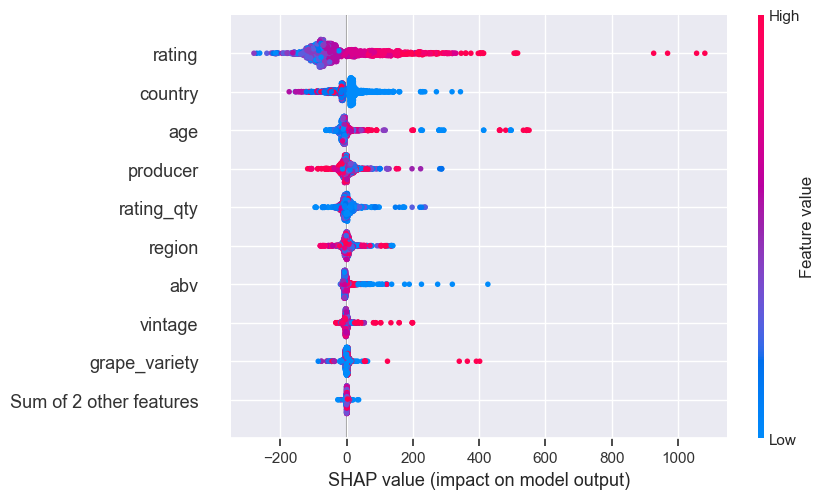

In [211]:
import shap

explainer = shap.Explainer(rf_tuned)
shap_values = explainer(X_train)

shap.plots.beeswarm(shap_values)

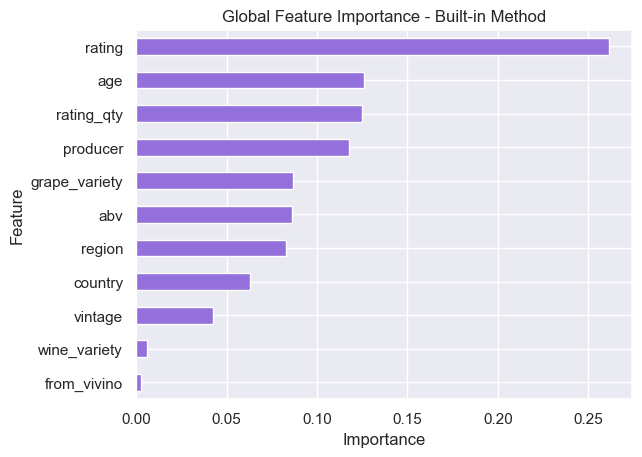

In [215]:
# code from https://forecastegy.com/posts/feature-importance-in-random-forests/#:~:text=Permutation%20feature%20importance%20is%20another,out%2Dof%2Dsample%20dataset.

global_importances = pd.Series(rf_tuned.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='mediumpurple')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method");

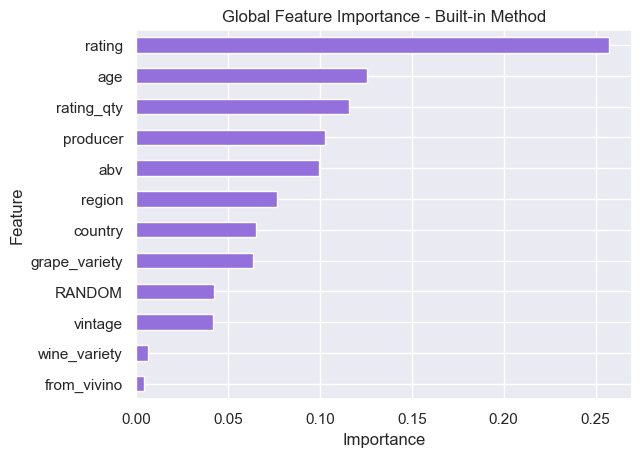

In [218]:
X_train_random = X_train.copy()
X_train_random["RANDOM"] = np.random.RandomState(42).randn(X_train.shape[0])

rf_random = RandomForestRegressor(max_depth = 40, min_samples_leaf = 1, min_samples_split = 2)
rf_random.fit(X_train_random, y_train)

global_importances_random = pd.Series(rf_random.feature_importances_, index=X_train_random.columns)
global_importances_random.sort_values(ascending=True, inplace=True)
global_importances_random.plot.barh(color='mediumpurple')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method");

In [205]:
# Seperate model for consumer only wines, target price. 

df_consumer_wines = df_30plusratings[df_30plusratings['price'] < 78]

X = df_consumer_wines.drop(columns = ['log_price', 'price'])
y = df_consumer_wines['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.85)

rf_tuned_2 = RandomForestRegressor(max_depth = 40, min_samples_leaf = 1, min_samples_split = 2)
rf_tuned_2 = rf_tuned_2.fit(X_train, y_train)
y_pred = rf_tuned_2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test RMSE price: {np.sqrt(mse)}")
print(f'Training Score: {round(rf_tuned_2.score(X_train, y_train),4)}')
print(f'Testing Score: {round(rf_tuned_2.score(X_test, y_test),4)}')

Test RMSE price: 3.3655637562569964
Training Score: 0.9934
Testing Score: 0.9568


In [206]:
# Seperate model for fine wines only, target = price. 

df_fine_wines = df_30plusratings[df_30plusratings['price'] > 78]

X = df_fine_wines.drop(columns = ['log_price', 'price'])
y = df_fine_wines['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.85)

rf_tuned_3 = RandomForestRegressor(max_depth = 40, min_samples_leaf = 1, min_samples_split = 2)
rf_tuned_3 = rf_tuned_3.fit(X_train, y_train)
y_pred = rf_tuned_3.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test RMSE price: {np.sqrt(mse)}")
print(f'Training Score: {round(rf_tuned_3.score(X_train, y_train),4)}')
print(f'Testing Score: {round(rf_tuned_3.score(X_test, y_test),4)}')

Test RMSE price: 66.87427652391906
Training Score: 0.9836
Testing Score: 0.7798


* Best performing model on test data includes all wines, targets log_price and is a random forests classifier with the following parameters: max_depth = 40, min_samples_leaf = 1, min_samples_split = 2. 

## Recursive Feature Elimination

Recursive Feature Elimination (RFE) - to see which features are most important to the RF model. These might eventually be the features users (or an API) inputs into the app. 

In [207]:
model = RandomForestRegressor()

# Initialize RFE with the linear regression model and desired number of features
rfe_lr = RFE(estimator=model, n_features_to_select=5, step=1)
rfe_lr.fit(X, y)
print("Feature ranking (1 indicates selected):", rfe_lr.ranking_)

# Print the mask of selected features
print("Mask of selected features:", rfe_lr.support_)

# Mapping back to feature names
selected_features = X.columns[rfe_lr.support_]
print("Selected features:", selected_features)

Feature ranking (1 indicates selected): [1 4 5 1 6 3 1 1 2 7 1]
Mask of selected features: [ True False False  True False False  True  True False False  True]
Selected features: Index(['region', 'producer', 'rating', 'rating_qty', 'age'], dtype='object')


**Random Forests Features Ranking (5 features to select)**<br>
Feature ranking (1 indicates selected): [1 4 1 1 7 5 1 1 3 6 2]<br>
Mask of selected features: [ True False  True  True False False  True  True False False False]<br>
Selected features: Index(['region', 'vintage', 'producer', 'rating', 'rating_qty'], dtype='object')<br>

**Decision Trees Features Ranking (1 feature to select)**<br>
Feature ranking (1 indicates selected): [ 7  6  8  5 10  9  2  3  1 11  4]<br>
Mask of selected features: [False False False False False False False False  True False False]<br>
Selected features: Index(['abv'], dtype='object')<br>

## Removing Features

In [ ]:
df_30plusratings = df[df['rating_qty'] > 30]

X = df_30plusratings.drop(columns = ['log_price', 'price'])
y = df_30plusratings['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.85)

rf_tuned = RandomForestRegressor(max_depth = 40, min_samples_leaf = 1, min_samples_split = 2)
rf_tuned = rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test RMSE price: {np.exp(np.sqrt(mse))}")
print(f'Training Score: {round(rf_tuned.score(X_train, y_train),4)}')
print(f'Testing Score: {round(rf_tuned.score(X_test, y_test),4)}')